In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt



In [23]:
behaviour = pd.read_csv("QVI_purchase_behaviour.csv")
transactions = pd.read_excel("QVI_transaction_data.xlsx")

## Project Brief: 
You are tasked with: 
- Creating and interpreting high-level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)
- Adding extra features such as size of packages and brand names 
- Determining whether customers are spending more per packet over time? Or are there more customers than chip purchases? So are customers multipack buyers? 

The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  



In [24]:
print(transactions.head())
print(behaviour.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004  

In [25]:
print(transactions.info())
# Change dates from xls to datetime format
excel_start_date = datetime(1899, 12, 30)
transactions['INT_DATE'] = transactions['DATE']
transactions['DATE'] = transactions['INT_DATE'].apply(lambda x: excel_start_date + timedelta(days=x))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


In [26]:
from collections import Counter

# Create list of words.
all_words_list = transactions['PROD_NAME'].apply(lambda x : x.split()).tolist()
all_words_list = [x for sublist in all_words_list for x in sublist]
all_words_list = [x for x in all_words_list if x.isalpha()]
word_counts = Counter(all_words_list)
print((word_counts.most_common()))

# Some entries are salsa and dip - we want to remove these.
transactions = transactions[~transactions['PROD_NAME'].str.contains("[dD]ip|[sS]alsa")]

[('Chips', 49770), ('Kettle', 41288), ('Smiths', 28860), ('Salt', 27976), ('Cheese', 27890), ('Pringles', 25102), ('Doritos', 24962), ('Crinkle', 23960), ('Corn', 22063), ('Original', 21560), ('Cut', 20754), ('Chip', 18645), ('Salsa', 18094), ('Chicken', 15407), ('Sea', 14145), ('Thins', 14075), ('Sour', 13882), ('Crisps', 12607), ('Vinegar', 12402), ('Chilli', 12389), ('RRD', 11894), ('Infuzions', 11057), ('Supreme', 10963), ('WW', 10320), ('Cobs', 9693), ('Popd', 9693), ('Tortilla', 9580), ('Tostitos', 9471), ('Twisties', 9454), ('Sensations', 9429), ('Old', 9324), ('El', 9324), ('Paso', 9324), ('Dip', 9324), ('Sweet', 7883), ('Lime', 7852), ('Tomato', 7669), ('Cream', 7618), ('Thinly', 7507), ('Tyrrells', 6442), ('And', 6373), ('BBQ', 6351), ('Tangy', 6332), ('Grain', 6272), ('Waves', 6272), ('Lightly', 6248), ('Salted', 6248), ('Soy', 6121), ('Natural', 6050), ('Mild', 6048), ('Red', 5885), ('Rock', 5885), ('Deli', 5885), ('Thai', 4737), ('Burger', 4733), ('Swt', 4718), ('Chives', 

In [27]:
transactions.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,INT_DATE
count,245304,245304.000000,2.453040e+05,2.453040e+05,245304.000000,245304.000000,245304.000000,245304.000000
mean,2018-12-30 01:25:33.196360448,135.053322,1.355352e+05,1.351340e+05,56.054883,1.908200,7.335517,43464.059412
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,43282.000000
25%,2018-09-30 00:00:00,70.000000,7.001400e+04,6.755875e+04,26.000000,2.000000,5.800000,43373.000000
50%,2018-12-30 00:00:00,130.000000,1.303675e+05,1.351865e+05,52.000000,2.000000,7.400000,43464.000000
75%,2019-03-31 00:00:00,203.000000,2.030862e+05,2.026662e+05,86.000000,2.000000,8.800000,43555.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,43646.000000
std,NaN,76.796402,8.074658e+04,7.815838e+04,33.569505,0.661172,3.080377,105.395385


From the summary, there seems to be outlier purchases of up to 200 packets. Lets investigate further. 

In [28]:
print(transactions[transactions['PROD_QTY'] > 100])


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  INT_DATE  
69762  Dorito Corn Chp     Supreme 380g       200      650.0     43331  
69763  Dorito Corn Chp     Supreme 380g       200      650.0     43605  


Let's look at the customer that made these purchases (226000)

In [29]:
transactions[transactions['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,INT_DATE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,43331
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,43605


Looks like the only purchases they made were the large purchases, so we can remove this customer from the dataset.

In [44]:
transactions = transactions[transactions['LYLTY_CARD_NBR'] != 226000]
transactions.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,INT_DATE,PROD_SIZE,CHIP_PRICE
count,245301,245301.000000,2.453010e+05,2.453010e+05,245301.000000,245301.000000,245301.000000,245301.000000,245301.000000,245301.000000
mean,2018-12-30 01:26:02.141206272,135.052694,1.355345e+05,1.351334e+05,56.055352,1.906584,7.330283,43464.059747,175.733499,3.839644
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,43282.000000,70.000000,1.320000
25%,2018-09-30 00:00:00,70.000000,7.001400e+04,6.755800e+04,26.000000,2.000000,5.800000,43373.000000,150.000000,3.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351860e+05,52.000000,2.000000,7.400000,43464.000000,170.000000,3.800000
75%,2019-03-31 00:00:00,203.000000,2.030860e+05,2.026650e+05,86.000000,2.000000,8.800000,43555.000000,175.000000,4.600000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,43646.000000,380.000000,6.500000
std,NaN,76.796412,8.074664e+04,7.815841e+04,33.569374,0.342364,2.474137,105.395146,59.573803,1.076806


In [31]:
# Count occurrences of each date
date_counts = transactions['DATE'].value_counts().sort_index()
print(len(date_counts))

364


There are only 364 dates! Let's find the missing date.

In [32]:
date_list = pd.date_range(datetime(2018, 7, 1), datetime(2019, 6, 30),freq='d').tolist()
datas_date_list = transactions['DATE'].unique()
outstanding_date = [d for d in date_list if d not in datas_date_list]
print(outstanding_date)

[Timestamp('2018-12-25 00:00:00')]


It's Christmas, which makes sense. Shops are closed over Christmas. Now let's plot transactions over time and zoom in to December!

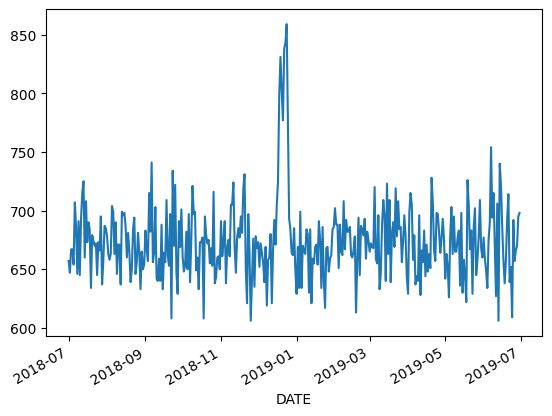

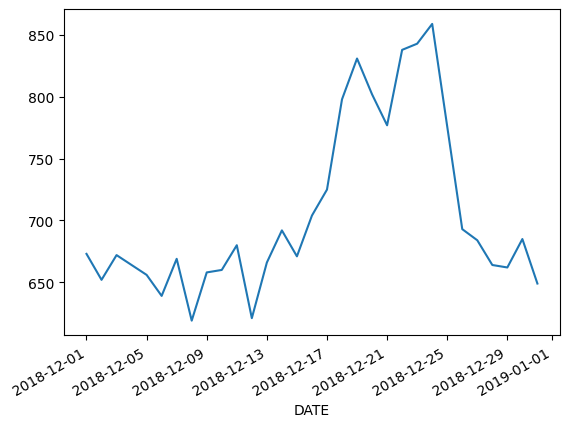

In [33]:

date_counts.plot()
plt.show()

december_date_counts = transactions['DATE'].loc[transactions['DATE'].apply(lambda x : x.month_name() == "December")].value_counts().sort_index()
december_date_counts.plot()
plt.show()

<Axes: >

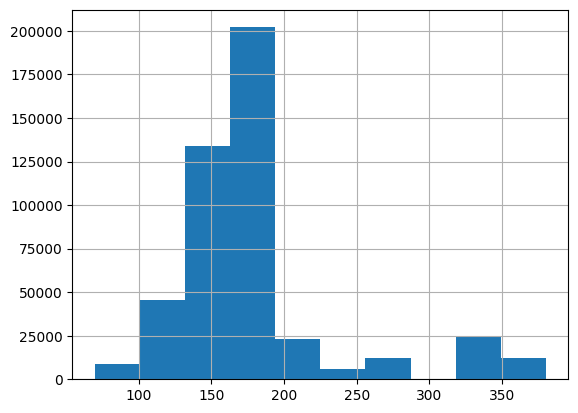

In [34]:
import re

# turn prod size into integer type
pd.options.display.max_rows = 150
transactions['PROD_SIZE'] = transactions['PROD_NAME'].apply(lambda x : int(re.findall(r'\d+', x)[0]))
value_counts = transactions['PROD_SIZE'].value_counts().sort_index()
transactions['PROD_SIZE'].hist(weights=transactions['PROD_QTY'])



In [35]:
# add brand names
transactions['PROD_BRAND'] = transactions['PROD_NAME'].apply(lambda x: x.split()[0])
transactions['PROD_BRAND'].value_counts()

PROD_BRAND
Kettle        41288
Smiths        25952
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [36]:
# group name aliases into one category
transactions['PROD_BRAND'] = transactions['PROD_BRAND'].replace("Red", "RRD")
transactions['PROD_BRAND'] = transactions['PROD_BRAND'].replace("Snbts", "Sunbites")
transactions['PROD_BRAND'] = transactions['PROD_BRAND'].replace("WW", "Woolworths")
transactions['PROD_BRAND'] = transactions['PROD_BRAND'].replace("NCC", "Natural")
transactions['PROD_BRAND'] = transactions['PROD_BRAND'].replace("Grain", "GrnWves")
transactions['PROD_BRAND'] = transactions['PROD_BRAND'].replace("Smith", "Smiths")
transactions['PROD_BRAND'] = transactions['PROD_BRAND'].replace("Infzns", "Infuzions")
transactions['PROD_BRAND'] = transactions['PROD_BRAND'].replace("Dorito", "Doritos")
transactions['PROD_BRAND'].value_counts()

PROD_BRAND
Kettle        41288
Smiths        28915
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWves        7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: count, dtype: int64

In [37]:
# Check for duplicate transactions and loyalty cards
print(pd.Series(transactions['TXN_ID']).is_unique)
print(pd.Series(behaviour['LYLTY_CARD_NBR']).is_unique)

# Remove duplicated data
print(transactions[transactions.duplicated(keep=False)])
transactions = transactions.drop_duplicates()
print(behaviour[behaviour.duplicated(keep=False)])

False
True
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124843 2018-10-01        107          107024  108462        45   
124845 2018-10-01        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  INT_DATE  \
124843  Smiths Thinly Cut   Roast Chicken 175g         2        6.0     43374   
124845  Smiths Thinly Cut   Roast Chicken 175g         2        6.0     43374   

        PROD_SIZE PROD_BRAND  
124843        175     Smiths  
124845        175     Smiths  
Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [38]:
# Check loyalty numbers are consistent
print(transactions[~transactions['LYLTY_CARD_NBR'].isin(behaviour['LYLTY_CARD_NBR'])])

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, INT_DATE, PROD_SIZE, PROD_BRAND]
Index: []


In [39]:
# Join behaviour table with transactions table
transactions = transactions.merge(behaviour, on='LYLTY_CARD_NBR', how='inner', suffixes=('', ''))
transactions.isnull().sum()
print(transactions)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
245296 2019-03-09        272          272319  270088        89   
245297 2018-08-13        272          272358  270154        74   
245298 2018-11-06        272          272379  270187        51   
245299 2018-12-27        272          272379  270188        42   
245300 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

Now let's make some graphs to analyse the behaviours of different customer segments!

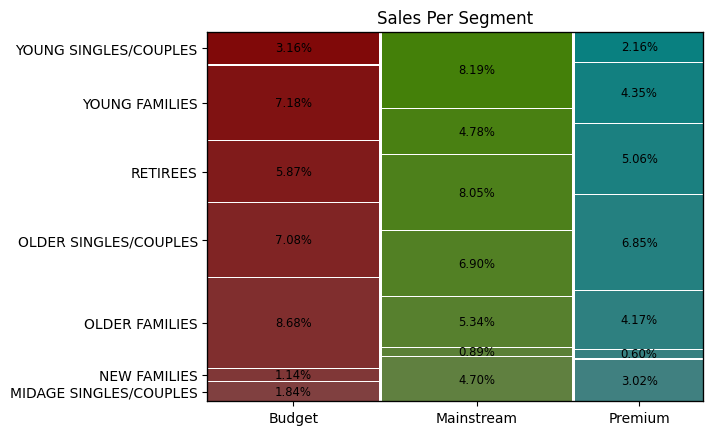

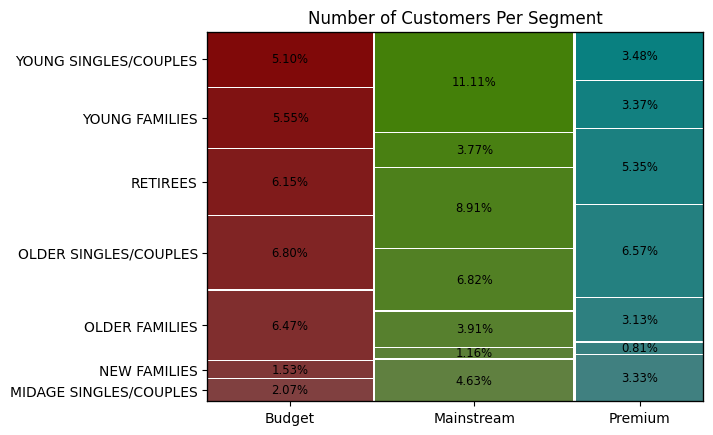

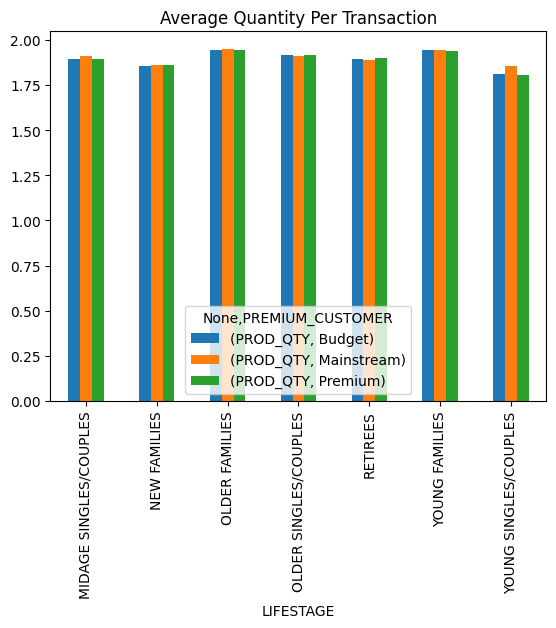

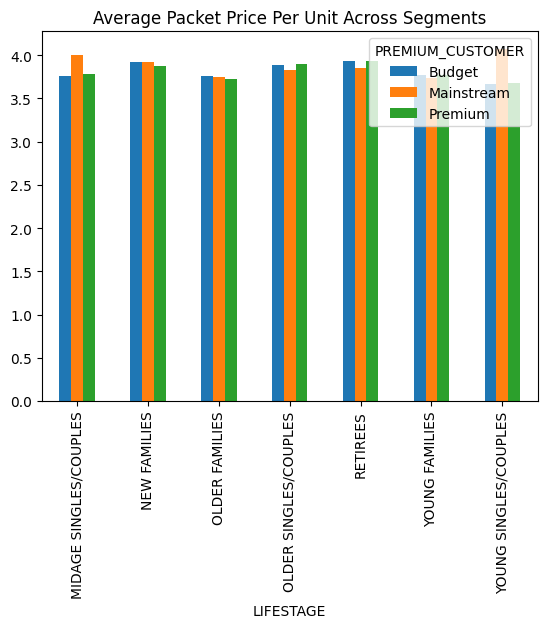

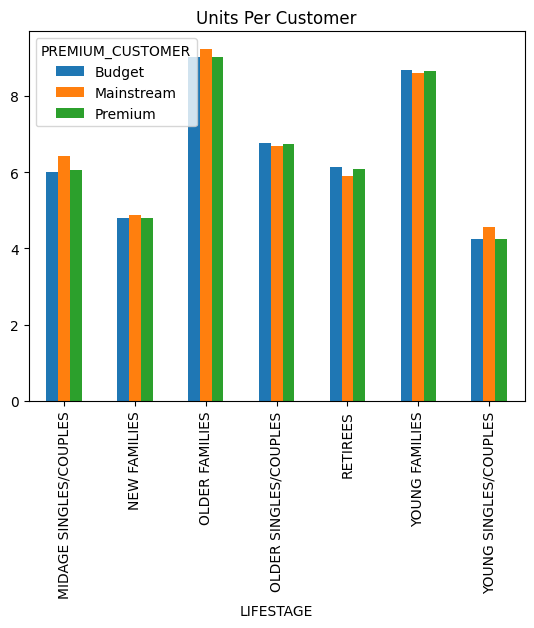

In [40]:
from statsmodels.graphics.mosaicplot import mosaic

grouped_sum = transactions.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum()
def labelizer(k):
    fraction = (transactions.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum() / transactions['TOT_SALES'].sum())[k]
    return f"{fraction * 100:.2f}%"
mosaic(grouped_sum, labelizer=labelizer)
plt.title("Sales Per Segment")
plt.show()

grouped_sum = transactions.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].nunique()
def labelizer(k):
    fraction = (transactions.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].nunique() / transactions['LYLTY_CARD_NBR'].nunique())[k]
    return f"{fraction * 100:.2f}%"
mosaic(grouped_sum, labelizer=labelizer)
plt.title("Number of Customers Per Segment")
plt.show()

transactions.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'PROD_QTY': 'mean'}).unstack(level=1).plot(kind='bar')
plt.title("Average Quantity Per Transaction")
plt.show()

transactions['CHIP_PRICE'] = transactions['TOT_SALES'] / transactions['PROD_QTY']
mean_price = transactions.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['CHIP_PRICE'].mean().unstack(level=1).plot(kind='bar')
plt.title("Average Packet Price Per Unit Across Segments")
plt.show()

averages = transactions.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    sum_qty=('PROD_QTY', 'sum'),
    count=('LYLTY_CARD_NBR', 'nunique')
)
(averages['sum_qty'] / averages['count']).unstack(level=1).plot(kind='bar')
plt.title("Units Per Customer")
plt.show()

Some insights
- 3 largest contributors to sales are 1. Budget older families, 2. Mainstream young singles/couples, 3. Mainstream retirees.
- 3 largest customer bases are 1. Mainstream young singles and couples 2. Mainsteam retirees 3. Mainstream older singles and couples.
- All customers buy a little under 2 packets per transaction on average.
- Older families and young families purchase the most packets per customer (makes sense since famlilies have the most people).

Another interesting insight is that it seems like mainstream midage and young singles and couples buy more expensive packets of chips than their budget and premium counterparts. Let's analyse this. 

In [41]:
import scipy.stats as stats

young_midage_couples = transactions[transactions['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])]
t_stat, p_value = stats.ttest_ind(
    young_midage_couples[young_midage_couples['PREMIUM_CUSTOMER'] == 'Mainstream']['CHIP_PRICE'],
    young_midage_couples[young_midage_couples['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])]['CHIP_PRICE'],
)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 37.51607849499714, P-value: 2.6065635054157394e-304


Therefore we reject the hypothesis that the average chip price for the two groups of customers is the same. The average packet price is statistically significantly more expensive for mainstream singles and couples than for budgeet and premium.

Now let's do a deep dive in to mainstream young singles and couples. First we will look to see which brands that this group has a particular affinity for.

In [47]:
msy = transactions[(transactions['PREMIUM_CUSTOMER'] == 'Mainstream') & (transactions['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
notmsy = transactions[~((transactions['PREMIUM_CUSTOMER'] == 'Mainstream') & (transactions['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'))]

msy_brand_counts = msy['PROD_BRAND'].value_counts() / msy['PROD_BRAND'].value_counts().sum()
all_brand_counts = notmsy['PROD_BRAND'].value_counts() / notmsy['PROD_BRAND'].value_counts().sum()

affinities = pd.DataFrame(msy_brand_counts).merge(all_brand_counts, on="PROD_BRAND", suffixes=("_test", "_whole"))
affinities['affinity'] = affinities['count_test'] / affinities['count_whole']
affinities = affinities.sort_values(by='affinity', ascending=False)
print(affinities)

19472 225829 245301
            count_test  count_whole  affinity
PROD_BRAND                                   
Tyrrells      0.031789     0.025785  1.232858
Twisties      0.046220     0.037878  1.220232
Doritos       0.122175     0.101161  1.207737
Tostitos      0.045707     0.037998  1.202877
Kettle        0.197412     0.165807  1.190612
Pringles      0.118889     0.100904  1.178238
Cobs          0.044371     0.039096  1.134936
Infuzions     0.064195     0.057349  1.119376
GrnWves       0.033176     0.031413  1.056113
Thins         0.059881     0.057163  1.047551
Cheezels      0.017769     0.018851  0.942631
Smiths        0.094957     0.119847  0.792315
Cheetos       0.008525     0.012226  0.697286
French        0.004006     0.005934  0.675086
RRD           0.044936     0.068397  0.656994
Natural       0.020234     0.031329  0.645861
CCs           0.011401     0.019169  0.594750
Sunbites      0.006574     0.012753  0.515450
Woolworths    0.024599     0.050290  0.489149
Burger        

It seems that this group is 23% more likely to buy Tyrrells chips.

Let's also see if there are any differences in the size of packets purchased by this group compared to the population.

178.44905505341004 64.01102725484878
175.73349884427702 59.57380343341888
           count_test  count_whole  affinity
PROD_SIZE                                   
270          0.031841     0.025085  1.269290
380          0.032149     0.025639  1.253906
330          0.061370     0.050237  1.221610
134          0.118889     0.100904  1.178238
210          0.029581     0.025223  1.172794
110          0.105331     0.090050  1.169686
135          0.014893     0.013138  1.133573
250          0.014380     0.012793  1.124034
170          0.080885     0.081513  0.992300
150          0.154478     0.158337  0.975632
175          0.256625     0.271852  0.943989
165          0.056594     0.062857  0.900358
190          0.007601     0.012607  0.602897
180          0.003595     0.006191  0.580711
160          0.006574     0.012585  0.522342
90           0.006574     0.012753  0.515450
70           0.003235     0.006394  0.505991
125          0.003030     0.006177  0.490509
200          0.009193     

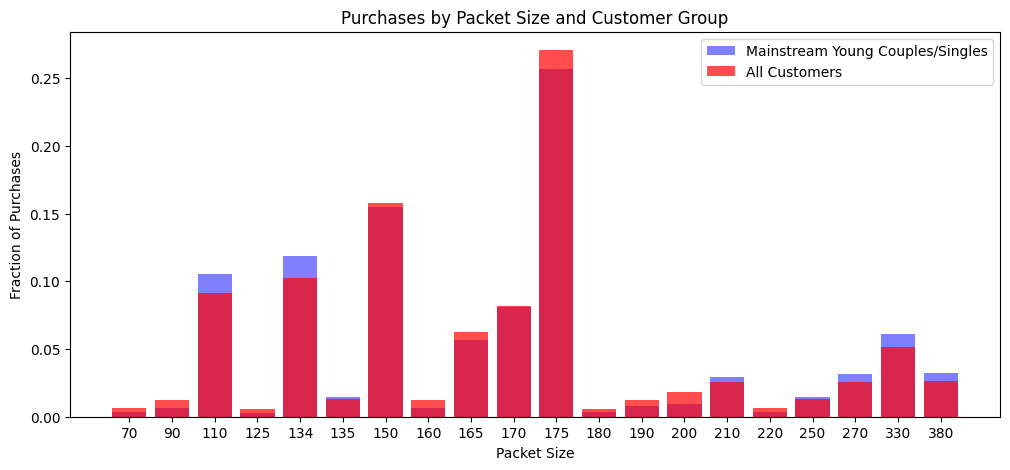

In [50]:
# Average packet size and stdev for test group vs whole population
msy_sizes = msy['PROD_SIZE'].value_counts().sort_index()
print(msy['PROD_SIZE'].mean(), msy['PROD_SIZE'].std())
all_sizes = transactions['PROD_SIZE'].value_counts().sort_index()
print(transactions['PROD_SIZE'].mean(), transactions['PROD_SIZE'].std())

msy_brand_proportion = msy['PROD_SIZE'].value_counts() / msy['PROD_SIZE'].value_counts().sum()
all_brand_proportion = notmsy['PROD_SIZE'].value_counts() / notmsy['PROD_SIZE'].value_counts().sum()

affinities = pd.DataFrame(msy_brand_proportion).merge(all_brand_proportion, on="PROD_SIZE", suffixes=("_test", "_whole"))
affinities['affinity'] = affinities['count_test'] / affinities['count_whole']
affinities = affinities.sort_values(by='affinity', ascending=False)
print(affinities)

print(transactions[transactions['PROD_SIZE'] == 270]['PROD_NAME'].unique())

# Graphing packet size for test group vs whole population
packet_sizes = msy_sizes.to_dict().keys()
packet_sizes = [str(x) for x in packet_sizes]
packet_sizes = np.array(packet_sizes)

msy_standard = msy_sizes / msy_sizes.sum()
all_standard = all_sizes / all_sizes.sum()

plt.figure(figsize=(12, 5))
plt.bar(packet_sizes, msy_standard, label="Mainstream Young Couples/Singles", alpha=0.5, color='blue')
plt.bar(packet_sizes, all_standard, label="All Customers", alpha=0.7, color='red')
plt.xlabel("Packet Size")
plt.ylabel("Fraction of Purchases")
plt.title("Purchases by Packet Size and Customer Group")
plt.xticks(packet_sizes)  # Ensure x-axis labels match packet sizes

plt.legend()

It looks like mainstream young singles and couples are 26% more likely to purchase 270g chip packets which are Twisties chips.

## Conclusions
- 3 largest contributors to sales are 1. Budget older families, 2. Mainstream young singles/couples, 3. Mainstream retirees.
- 3 largest customer bases are 1. Mainstream young singles and couples 2. Mainsteam retirees 3. Mainstream older singles and couples.
- All customers buy a little under 2 packets per transaction on average.
- Older families and young families purchase the most packets per customer (makes sense since famlilies have the most people).
- Mainstream young singles/couple are 23% more likely to purchase Tyrells chips than other segments, and 26% more likely to purchase 270g chip packets which are Twisties chips